In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
import pickle
with open('data_lagged.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df['Date'] = df['Date'].astype(str)

In [4]:
df.head()

,text,Date,Label,newdate1,newdate2,newdate3,lag1,lag2,lag3
0,georgia down two russia warplane a country mov...,2008-08-08,0,2008-08-09,2008-08-10,2008-08-11,NaN,NaN,1.0
1,why wont united_states and nato help united_st...,2008-08-11,1,2008-08-12,2008-08-13,2008-08-14,0.0,0.0,1.0
2,remember that adorable yearold who sang at the...,2008-08-12,0,2008-08-13,2008-08-14,2008-08-15,0.0,1.0,1.0
3,united_states refuse israel weapon to attack i...,2008-08-13,0,2008-08-14,2008-08-15,2008-08-16,1.0,1.0,NaN
4,all the expert admit that we should legalise d...,2008-08-14,1,2008-08-15,2008-08-16,2008-08-17,1.0,NaN,NaN


In [5]:
import numpy as np
import math
from math import isnan

def convert_nan(row):
    if np.isnan(row['lag1']):
        row['lag1'] = row['Label']
    if np.isnan(row['lag2']):
        row['lag2'] = row['lag1']    
    if np.isnan(row['lag3']):
        row['lag3'] = row['lag2']  
    return row
        
df = df.apply(lambda row: convert_nan(row), axis = 1)


In [220]:
train = df[df['Date'] < '2015-01-01']
test = df[df['Date'] > '2014-12-31']

In [222]:
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(train['text'])
df_train = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

## Choosing number of components with a scree plot

In [154]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=20, n_iter=50, random_state=42)
svd.fit(X) 
svd.transform(X)

# pca2 = PCA(n_components=15)
# pca2.fit(X_train)
# pcafeatures_train2 = pca2.transform(X_train)

array([[10.40851927,  4.28823476,  5.82880248, ...,  1.31889312,
        -0.20046095, -3.67348794],
       [ 8.16196103,  5.05806067,  6.9437094 , ...,  1.31401844,
        -0.78394556, -0.14655109],
       [ 8.27953992,  4.99211138,  6.1630044 , ...,  3.2901269 ,
         0.89794662, -3.00906638],
       ...,
       [ 7.36870786,  1.89830138,  0.98665995, ..., -1.67563217,
         0.56626796,  0.05231865],
       [ 6.61860955,  1.52311707, -1.40105135, ..., -1.05200141,
        -1.05775212,  0.90709687],
       [ 8.42087406,  1.76306941, -0.58732829, ...,  0.58807167,
        -2.21851243,  1.44671648]])

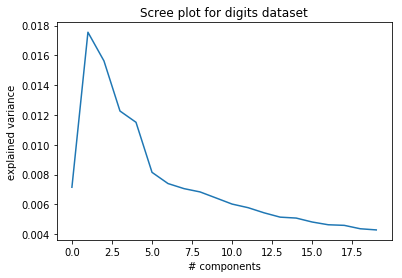

In [73]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(svd.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

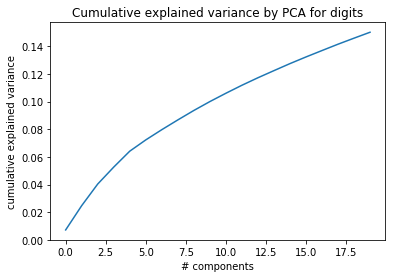

In [74]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

## Advanced model 

In [223]:
cv = CountVectorizer(stop_words='english')
X_fit = cv.fit(train['text'])
X_transform = X_fit.transform(train['text'])
df_train = pd.DataFrame(X_transform.toarray(), columns=cv.get_feature_names())
df_train.shape

(1611, 29726)

In [224]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10, n_iter=100, random_state=42)
svd_fit = svd.fit(X_transform)  
svd_transform = svd_fit.transform(X_transform)
# print(svd.explained_variance_ratio_) 
# print(svd.explained_variance_ratio_.sum())  

In [226]:
svd_transform = pd.DataFrame(svd_transform)

In [227]:
svd_transform['lag1'] = train['lag1']
svd_transform['lag2'] = train['lag2']
svd_transform['lag3'] = train['lag3']

In [228]:
test = test.reset_index()

(1611, 13)

In [ ]:
updatedmodel = LogisticRegression()
updatedmodel_fit = updatedmodel.fit(svd_transform, train['Label'])

X_test_cv = X_fit.transform(test['text'])
X_test_svd = svd_fit.transform(X_test_cv)
X_test_svd  = pd.DataFrame(X_test_svd)
X_test_svd['lag1'] = test['lag1']
X_test_svd['lag2'] = test['lag2']
X_test_svd['lag3'] = test['lag3']

# predictions = updatedmodel_fit.predict(X_test_svd)

In [231]:
predictions = updatedmodel_fit.predict(X_test_svd)

In [232]:
pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,85,101
1,65,127


In [233]:
y_t = test['Label']
# y_t =pd.DataFrame(y_t)
np.array(y_t)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

### New Accuracy is 56%!

In [201]:
import pickle

with open('data_train.pickle', 'wb') as to_write:
    pickle.dump(svd_transform, to_write)

In [205]:
import pickle

with open('data_train_y.pickle', 'wb') as to_write:
    pickle.dump(y, to_write)

In [206]:
import pickle

with open('data_test.pickle', 'wb') as to_write:
    pickle.dump(X_test_svd, to_write)

In [213]:
import pickle

with open('data_test_y.pickle', 'wb') as to_write:
    pickle.dump(y_t, to_write)